## Step 1 : Problem Definition

The case is a regression problem predicting the Student's final score (linear regression ) and the probability of them passing or failing based on 3 input features [Study_hours,Attendance,Practice_Tests]

Data is available 

## Step 2  : Data Collection 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
df = pd.read_csv("studentPerformance.csv")

## Step 3 : Data Preprocessing
this step can be skipped due to the data being ready 
(sa77a khalifa)

## Step 4 : EDA 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_Hours     500 non-null    float64
 1   Attendance      500 non-null    float64
 2   Practice_Tests  500 non-null    int64  
 3   Final_Score     500 non-null    float64
 4   Pass_Fail       500 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 19.7 KB


In [3]:
df.describe()

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.965976,74.762271,3.454000,51.919237,0.522000
std,2.917564,14.500958,2.337265,19.185543,0.500016
min,0.046955,50.027298,0.000000,10.493622,0.000000
25%,2.478259,62.380673,1.000000,36.071517,0.000000
50%,4.868419,73.986136,3.000000,51.225682,1.000000
75%,7.307458,86.996866,6.000000,67.720986,1.000000
max,9.988470,99.990429,7.000000,96.846976,1.000000


In [4]:
df.head()

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
0,5.488135,65.519041,1,49.410622,0
1,7.151894,68.651743,5,73.816958,1
2,6.027634,76.248522,6,65.951702,1
3,5.448832,87.529751,4,57.617793,1
4,4.236548,66.675373,2,38.016920,0


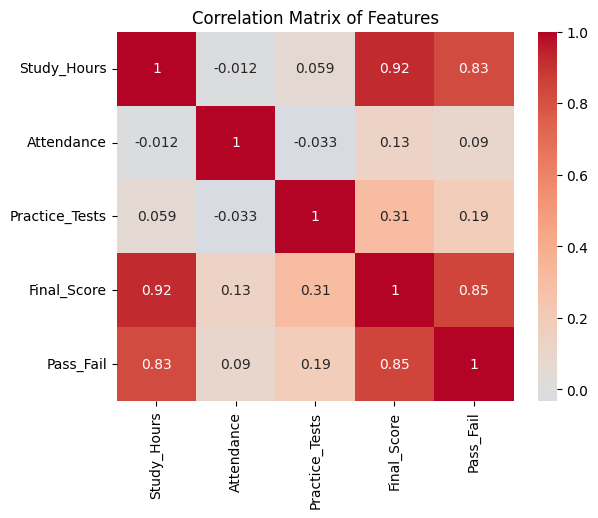

In [5]:
## Correlation Matrix
plt.figure()
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

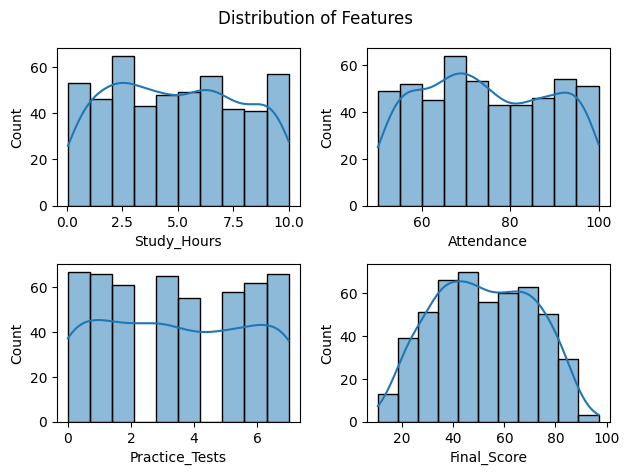

In [6]:
# Distribution plots
fig, axes = plt.subplots(2, 2)
fig.suptitle('Distribution of Features')

sns.histplot(data=df, x='Study_Hours', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='Attendance', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='Practice_Tests', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='Final_Score', kde=True, ax=axes[1,1])

plt.tight_layout()
plt.show()

data is properly distributed and doesnt seem to present any skewness

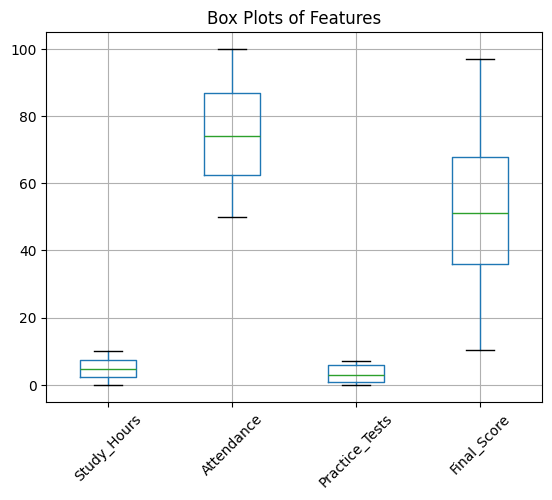

In [7]:
# Box plots for outlier detection

df.boxplot(column=['Study_Hours', 'Attendance', 'Practice_Tests', 'Final_Score'])
plt.title('Box Plots of Features')
plt.xticks(rotation=45)
plt.show()

No outliers detected

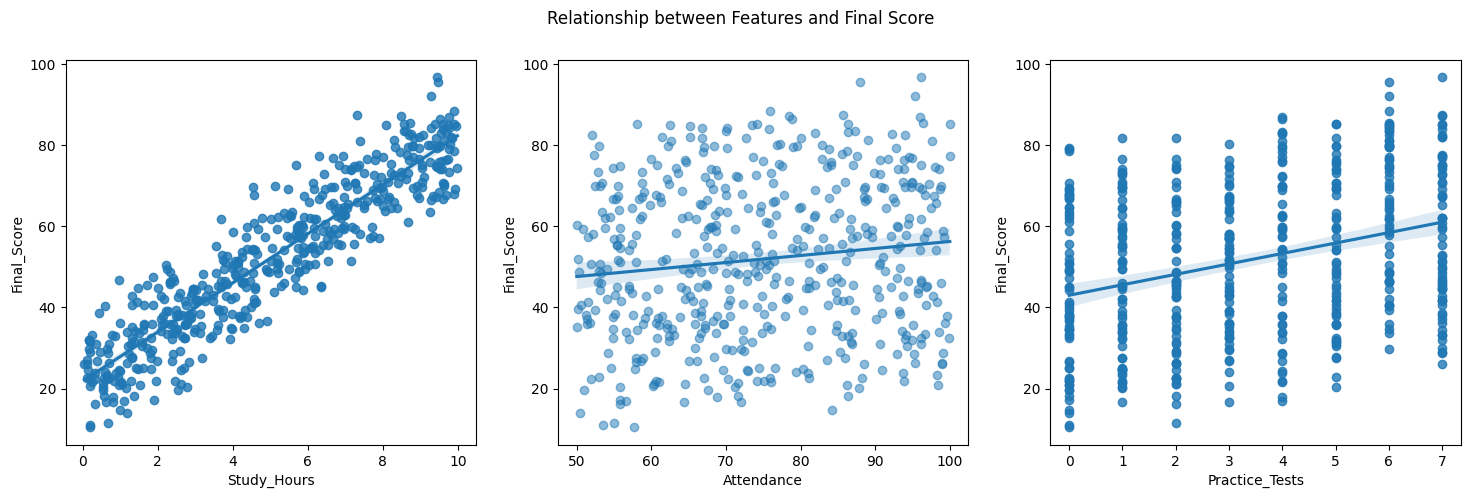

In [8]:
# Scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relationship between Features and Final Score')

sns.regplot(data=df, x='Study_Hours', y='Final_Score', ax=axes[0])
sns.regplot(data=df, x='Attendance', y='Final_Score', ax=axes[1],scatter_kws={"alpha" : 0.5})
sns.regplot(data=df, x='Practice_Tests', y='Final_Score', ax=axes[2])


plt.show()

# Results : 

Study_Hours highly correlates with Final Score 

Practice tests presents and interesting correlation as the minimum of the final score increases with practice test engament

Attendance to final score presents a lot of outliers ===> Bad correlation


these results suggest a strong relationship between study hours  + practice tests  and the final score 


## Step 5 : Feature Engineering 


In [9]:
df['Study_Hours'] = df['Study_Hours']*5
df['Study_X_Practice'] = (df['Study_Hours']) * df['Practice_Tests']
df['Attendance_X_Study'] =(df['Attendance']) * (df['Study_Hours']) 
df["Attendance"] = df["Attendance"]/10



## Step 6 : Model Selection / Training and Testing
##  4 features considered + Data Normalisation



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
# from sklearn.model_selection import GridSearchCV


In [11]:
lr = LinearRegression()
logr = LogisticRegression()


In [12]:
X = df[['Study_Hours', 'Attendance', 'Practice_Tests',  'Attendance_X_Study']]
y = df['Final_Score']
y_log = df["Pass_Fail"]
X , y ,y_log =X.to_numpy() , y.to_numpy() , y_log.to_numpy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=420)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X,y_log,test_size=0.3,random_state=420)

In [14]:
# (X_log_train == X_train)

Normalising Data

In [15]:
lr.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
logr.fit(X_log_train,y_log_train)

c:\Users\Skander\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Text(0.5, 1.0, 'evaluation of linear regression')

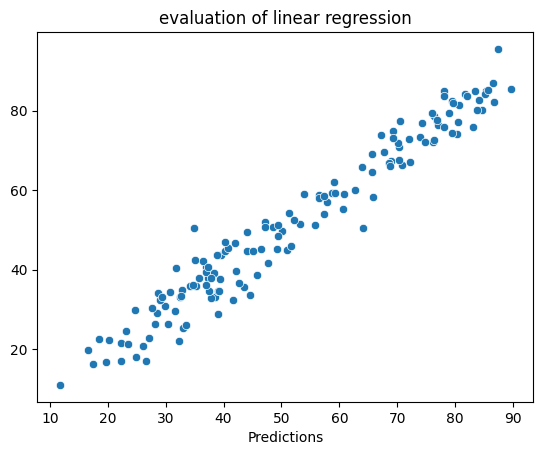

In [17]:
Predictions = lr.predict(X_test)
log_preds = logr.predict_proba(X_log_test)
sns.scatterplot(x=Predictions,y=y_test)
plt.xlabel('Predictions')
plt.title("evaluation of linear regression")





In [18]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math
print("mean abs error ", mean_absolute_error(y_test,Predictions))
print("mean sqrd error",mean_squared_error(y_test,Predictions))
print("RMSE",math.sqrt(mean_squared_error(y_test,Predictions)))


mean abs error  3.548272059817726
mean sqrd error 20.254413083680067
RMSE 4.500490315918929


numpy.ndarray

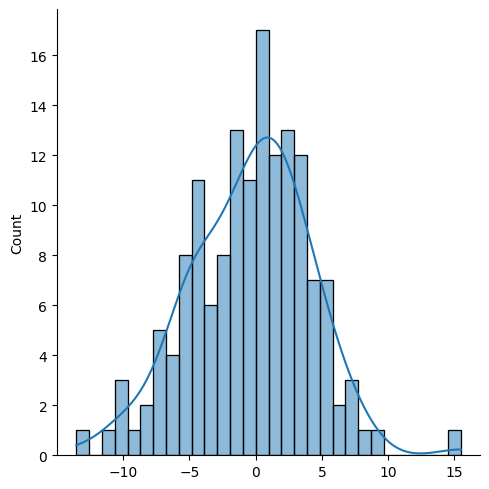

In [19]:
# Residuals
residuals =y_test - Predictions
sns.displot(residuals,bins=30,kde=True)
type(residuals)

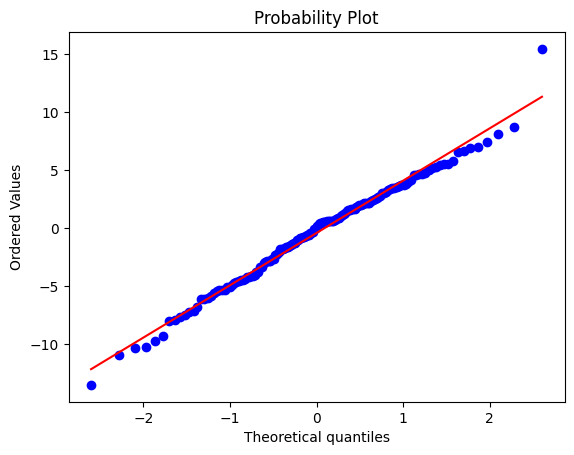

In [20]:
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score ,roc_auc_score

r2 = r2_score(y_test, Predictions)
print(f"Model test Accuracy (R² Score): {r2:.4f}")

log_class_preds = logr.predict(X_log_test)
log_proba_preds = logr.predict_proba(X_log_test)  # Get probabilities

accuracy = accuracy_score(y_log_test, log_class_preds)
auc_score = roc_auc_score(y_log_test, log_proba_preds[:, 1])

print(f"Logistic Regression test Accuracy: {accuracy:.4f}")
print(f"Logistic Regression test AUC-ROC: {auc_score:.4f}")

Model test Accuracy (R² Score): 0.9534
Logistic Regression test Accuracy: 0.9467
Logistic Regression test AUC-ROC: 0.9888


In [ ]:
import gradio as gr
def predict_score(study_hours, attendance, practice_tests):
    study_hours = study_hours*2
    attendance = attendance / 10
    practice_tests = practice_tests
    attendanceXstudy = attendance * study_hours

        
        # Create input array for prediction
    input_data = pd.DataFrame([[study_hours, attendance, practice_tests,attendanceXstudy]], 
                                columns=['Study_Hours', 'Attendance', 'Practice_Tests','AttendanceXStudy'])
        
        # Predict score
    predicted_score = lr.predict(input_data)[0]
    pass_fail = "pass" if logr.predict(input_data)[0]==1 else "fail"
    passing_prob = logr.predict_proba(input_data)[0,1]
        
        # Format output
    return (f"Predicted Final Score: {predicted_score:.2f}\n"f"Passing probability : {passing_prob:.2f}\n"f"Status: {pass_fail}")
    

iface = gr.Interface(
    fn=predict_score,
    inputs=[
        gr.Number(label="Study Hours (0-10)", value=5),
        gr.Number(label="Attendance (%) (50-100)", value=75),
        gr.Number(label="Practice Tests (0-7)", value=3)
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Student Performance Predictor",
    description="Enter Study Hours, Attendance, and number of Practice Tests to predict a student's final score and pass/fail status (passing score ≥ 50)."
)

iface.launch(share=True)

c:\Users\Skander\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
